## Downloading data

In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://api.figshare.com/v2/articles/14096681"
output_directory = "figsharerainfall/"

response = requests.request("GET", url)
data = json.loads(response.text)
files = data["files"]
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [3]:
%%time
files_to_dl = ["data.zip"]
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: user 4.92 s, sys: 3.64 s, total: 8.56 s
Wall time: 57.9 s


In [4]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: user 14.7 s, sys: 1.04 s, total: 15.7 s
Wall time: 16.6 s


In [5]:
%ls -ltr figsharerainfall/

total 36087176
drwxr-xr-x  30 sukhleen  staff          960 28 Mar 15:15 __MACOSX/
-rw-r--r--   1 sukhleen  staff  12098905446 28 Mar 16:00 combined_data.csv
-rw-r--r--   1 sukhleen  staff    814041183 31 Mar 20:02 data.zip
-rw-r--r--   1 sukhleen  staff     95376895 31 Mar 20:02 MPI-ESM-1-2-HAM_daily_rainfall_NSW.csv
-rw-r--r--   1 sukhleen  staff     94960113 31 Mar 20:02 AWI-ESM-1-1-LR_daily_rainfall_NSW.csv
-rw-r--r--   1 sukhleen  staff     82474546 31 Mar 20:02 NorESM2-LM_daily_rainfall_NSW.csv
-rw-r--r--   1 sukhleen  staff    127613760 31 Mar 20:02 ACCESS-CM2_daily_rainfall_NSW.csv
-rw-r--r--   1 sukhleen  staff    232118894 31 Mar 20:02 FGOALS-f3-L_daily_rainfall_NSW.csv
-rw-r--r--   1 sukhleen  staff    330360682 31 Mar 20:02 CMCC-CM2-HR4_daily_rainfall_NSW.csv
-rw-r--r--   1 sukhleen  staff    254009247 31 Mar 20:02 MRI-ESM2-0_daily_rainfall_NSW.csv
-rw-r--r--   1 sukhleen  staff    235661418 31 Mar 20:02 GFDL-CM4_daily_rainfall_NSW.csv
-rw-r--r--   1 sukhleen  staff    29426

## Combining CSVs

In [6]:
%%time
use_cols = ["time", "lat_min", "lat_max", "lon_min", "lon_max", "rain (mm/day)"]
files = glob.glob('figsharerainfall/*.csv')
files.remove('figsharerainfall/observed_daily_rainfall_SYD.csv')

df = pd.concat((pd.read_csv(file, index_col=0, usecols=use_cols)
                .assign(model=re.findall(r'[^\/]+(?=\.)', file)[0].split("_daily")[0])
                for file in files)
              )
df.to_csv("figsharerainfall/combined_data.csv")

CPU times: user 18min 7s, sys: 37.9 s, total: 18min 45s
Wall time: 19min 9s


In [7]:
%%sh
du -sh figsharerainfall/combined_data.csv

 17G	figsharerainfall/combined_data.csv


In [8]:
df.shape

(187403529, 6)

In [9]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM


#### Run times:

| Team Member | Operating System | RAM | Processor | Is SSD | CPU times | Wall time |
| --- | --- | --- | --- | --- | --- | --- | 
| Daniel   | ---   | --- | --- | --- | --- | --- | 
| Pavel    | ---   | --- | --- | --- | --- | --- | 
| Rong     | ---   | --- | --- | --- | --- | --- | 
| Sukhleen | MacOS | 16GB | M1 | Yes | 18min 45s | 19min 9s | 

## EDA in Python

### Loading the combined data into memory and performing simple EDA

In [10]:
%%time
df = pd.read_csv("figsharerainfall/combined_data.csv", index_col=0)
df['model'].value_counts()

CPU times: user 2min 25s, sys: 21.3 s, total: 2min 46s
Wall time: 9min 28s


IOStream.flush timed out


combined_data       124935686
MPI-ESM1-2-HR         5154240
CMCC-ESM2             3541230
NorESM2-MM            3541230
TaiESM1               3541230
CMCC-CM2-SR5          3541230
CMCC-CM2-HR4          3541230
SAM0-UNICON           3541153
GFDL-CM4              3219300
FGOALS-f3-L           3219300
GFDL-ESM4             3219300
MRI-ESM2-0            3037320
EC-Earth3-Veg-LR      3037320
BCC-CSM2-MR           3035340
MIROC6                2070900
ACCESS-CM2            1932840
ACCESS-ESM1-5         1610700
INM-CM5-0             1609650
INM-CM4-8             1609650
KIOST-ESM             1287720
FGOALS-g3             1287720
AWI-ESM-1-1-LR         966420
MPI-ESM1-2-LR          966420
NESM3                  966420
MPI-ESM-1-2-HAM        966420
NorESM2-LM             919800
BCC-ESM1               551880
CanESM5                551880
Name: model, dtype: int64

#### Run times:

| Team Member | Operating System | RAM | Processor | Is SSD | CPU times | Wall time |
| --- | --- | --- | --- | --- | --- | --- | 
| Daniel   | ---   | --- | --- | --- | --- | --- | 
| Pavel    | ---   | --- | --- | --- | --- | --- | 
| Rong     | ---   | --- | --- | --- | --- | --- | 
| Sukhleen | MacOS | 16GB | M1 | Yes | 2min 46s | 9min 28s | 

In [11]:
df

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM
...,...,...,...,...,...,...
2014-12-27 12:00:00,-30.157068,-29.214660,153.1250,154.3750,6.689683e+00,SAM0-UNICON
2014-12-28 12:00:00,-30.157068,-29.214660,153.1250,154.3750,7.862555e+00,SAM0-UNICON
2014-12-29 12:00:00,-30.157068,-29.214660,153.1250,154.3750,1.000503e+01,SAM0-UNICON


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187403529 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float64
 1   lat_max        float64
 2   lon_min        float64
 3   lon_max        float64
 4   rain (mm/day)  float64
 5   model          object 
dtypes: float64(5), object(1)
memory usage: 9.8+ GB


In [13]:
%%time
df.describe()

CPU times: user 18.6 s, sys: 16.5 s, total: 35 s
Wall time: 37.5 s


,lat_min,lat_max,lon_min,lon_max,rain (mm/day)
count,1.777456e+08,1.874035e+08,1.777456e+08,1.874035e+08,1.777456e+08
mean,-3.310482e+01,-3.197757e+01,1.469059e+02,1.482150e+02,1.901170e+00
std,1.963549e+00,1.992067e+00,3.793784e+00,3.809994e+00,5.585735e+00
min,-3.646739e+01,-3.600000e+01,1.406250e+02,1.412500e+02,-3.807373e-12
25%,-3.486911e+01,-3.366221e+01,1.434375e+02,1.450000e+02,3.838408e-06
50%,-3.300000e+01,-3.204188e+01,1.468750e+02,1.481250e+02,6.154947e-02
75%,-3.140170e+01,-3.015707e+01,1.501875e+02,1.513125e+02,1.020918e+00
max,-2.990000e+01,-2.790606e+01,1.537500e+02,1.556250e+02,4.329395e+02


> The entire dataset usage more than 6.5GB worth of memory! Let's try to explore methods to reduce the memory usage.

## Investigating methods to reduce memory usage

### Method 1: Changing the data types of the columns

In [14]:
print(f"Memory usage with float64: {df[['lat_min','lat_max','lon_min','lon_max','rain (mm/day)']].memory_usage().sum() / 1e6:.2f} MB")
print(f"Memory usage with float32: {df[['lat_min','lat_max','lon_min','lon_max','rain (mm/day)']].astype('float32', errors='ignore').memory_usage().sum() / 1e6:.2f} MB")

Memory usage with float64: 8995.37 MB
Memory usage with float32: 5247.30 MB


In [15]:
%%time
dtypes = {"lat_min": "float32",
          "lat_max": "float32",
          "lon_min": "float32",
          "lon_max": "float32",
          "rain (mm/day)": "float32"}

df_red_dtypes = pd.read_csv("figsharerainfall/combined_data.csv", index_col=0, dtype=dtypes)
print(df_red_dtypes["model"].value_counts())

combined_data       124935686
MPI-ESM1-2-HR         5154240
CMCC-ESM2             3541230
NorESM2-MM            3541230
TaiESM1               3541230
CMCC-CM2-SR5          3541230
CMCC-CM2-HR4          3541230
SAM0-UNICON           3541153
GFDL-CM4              3219300
FGOALS-f3-L           3219300
GFDL-ESM4             3219300
MRI-ESM2-0            3037320
EC-Earth3-Veg-LR      3037320
BCC-CSM2-MR           3035340
MIROC6                2070900
ACCESS-CM2            1932840
ACCESS-ESM1-5         1610700
INM-CM5-0             1609650
INM-CM4-8             1609650
KIOST-ESM             1287720
FGOALS-g3             1287720
AWI-ESM-1-1-LR         966420
MPI-ESM1-2-LR          966420
NESM3                  966420
MPI-ESM-1-2-HAM        966420
NorESM2-LM             919800
BCC-ESM1               551880
CanESM5                551880
Name: model, dtype: int64
CPU times: user 2min 24s, sys: 18.5 s, total: 2min 43s
Wall time: 2min 56s


#### Run times:

| Team Member | Operating System | RAM | Processor | Is SSD | CPU times | Wall time |
| --- | --- | --- | --- | --- | --- | --- | 
| Daniel   | ---   | --- | --- | --- | --- | --- | 
| Pavel    | ---   | --- | --- | --- | --- | --- | 
| Rong     | ---   | --- | --- | --- | --- | --- | 
| Sukhleen | MacOS | 16GB | M1 | Yes | 2min 43s | 2min 56s | 

In [16]:
df_red_dtypes

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.439865,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439865,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439865,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439865,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439865,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM
...,...,...,...,...,...,...
2014-12-27 12:00:00,-30.157068,-29.214659,153.1250,154.3750,6.689683e+00,SAM0-UNICON
2014-12-28 12:00:00,-30.157068,-29.214659,153.1250,154.3750,7.862556e+00,SAM0-UNICON
2014-12-29 12:00:00,-30.157068,-29.214659,153.1250,154.3750,1.000503e+01,SAM0-UNICON


In [17]:
df_red_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187403529 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float32
 1   lat_max        float32
 2   lon_min        float32
 3   lon_max        float32
 4   rain (mm/day)  float32
 5   model          object 
dtypes: float32(5), object(1)
memory usage: 6.3+ GB


> By changing the data type of numeric columns from `float64` to `float32`, we have reduced the memory consumption to around 4.2GB.

In [18]:
%%time
df_red_dtypes.describe()

CPU times: user 15.1 s, sys: 8.47 s, total: 23.6 s
Wall time: 23.8 s


,lat_min,lat_max,lon_min,lon_max,rain (mm/day)
count,1.777456e+08,1.874035e+08,1.777456e+08,1.874035e+08,1.777456e+08
mean,-3.310709e+01,-3.197901e+01,1.469046e+02,1.482148e+02,1.901166e+00
std,1.963549e+00,1.992067e+00,3.793784e+00,3.809994e+00,5.585735e+00
min,-3.646739e+01,-3.600000e+01,1.406250e+02,1.412500e+02,-3.807373e-12
25%,-3.486911e+01,-3.366221e+01,1.434375e+02,1.450000e+02,3.838408e-06
50%,-3.300000e+01,-3.204189e+01,1.468750e+02,1.481250e+02,6.154947e-02
75%,-3.140170e+01,-3.015707e+01,1.501875e+02,1.513125e+02,1.020918e+00
max,-2.990000e+01,-2.790606e+01,1.537500e+02,1.556250e+02,4.329395e+02


### Method 2: Loading only selective columns - `time`, `rain (mm/day)` and `model`

In [19]:
%%time
use_cols = ['time','rain (mm/day)', 'model']
df_subset = pd.read_csv("figsharerainfall/combined_data.csv",usecols=use_cols, index_col=0)
print(df_subset['model'].value_counts())

combined_data       124935686
MPI-ESM1-2-HR         5154240
CMCC-ESM2             3541230
NorESM2-MM            3541230
TaiESM1               3541230
CMCC-CM2-SR5          3541230
CMCC-CM2-HR4          3541230
SAM0-UNICON           3541153
GFDL-CM4              3219300
FGOALS-f3-L           3219300
GFDL-ESM4             3219300
MRI-ESM2-0            3037320
EC-Earth3-Veg-LR      3037320
BCC-CSM2-MR           3035340
MIROC6                2070900
ACCESS-CM2            1932840
ACCESS-ESM1-5         1610700
INM-CM5-0             1609650
INM-CM4-8             1609650
KIOST-ESM             1287720
FGOALS-g3             1287720
AWI-ESM-1-1-LR         966420
MPI-ESM1-2-LR          966420
NESM3                  966420
MPI-ESM-1-2-HAM        966420
NorESM2-LM             919800
BCC-ESM1               551880
CanESM5                551880
Name: model, dtype: int64
CPU times: user 2min 2s, sys: 16 s, total: 2min 18s
Wall time: 2min 28s


#### Run times:

| Team Member | Operating System | RAM | Processor | Is SSD | CPU times | Wall time |
| --- | --- | --- | --- | --- | --- | --- | 
| Daniel   | ---   | --- | --- | --- | --- | --- | 
| Pavel    | ---   | --- | --- | --- | --- | --- | 
| Rong     | ---   | --- | --- | --- | --- | --- | 
| Sukhleen | MacOS | 16GB | M1 | Yes | 2min 18s | 2min 28s | 

In [20]:
df_subset

,rain (mm/day),model
time,,
1889-01-01 12:00:00,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,4.270161e-13,MPI-ESM-1-2-HAM
...,...,...
2014-12-27 12:00:00,6.689683e+00,SAM0-UNICON
2014-12-28 12:00:00,7.862555e+00,SAM0-UNICON
2014-12-29 12:00:00,1.000503e+01,SAM0-UNICON


In [21]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187403529 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 2 columns):
 #   Column         Dtype  
---  ------         -----  
 0   rain (mm/day)  float64
 1   model          object 
dtypes: float64(1), object(1)
memory usage: 4.2+ GB


> The memory usage of the selected columns `time` and `rain (mm/day)` is just 1.9GB. By selecting only the columns that we wanted to work with, we have reduced the memory usage significantly.

In [22]:
%%time
df_subset.describe()

CPU times: user 5.72 s, sys: 4.74 s, total: 10.5 s
Wall time: 11.5 s


,rain (mm/day)
count,1.777456e+08
mean,1.901170e+00
std,5.585735e+00
min,-3.807373e-12
25%,3.838408e-06
50%,6.154947e-02
75%,1.020918e+00
max,4.329395e+02


### Method 3: Loading data in chunks

In [23]:
%%time
counts = pd.Series(dtype=int)
for chunk in pd.read_csv("figsharerainfall/combined_data.csv", chunksize=10_000_000):
    counts = counts.add(chunk['model'].value_counts(), fill_value=0)
print(counts.astype(int))

ACCESS-CM2            1932840
ACCESS-ESM1-5         1610700
AWI-ESM-1-1-LR         966420
BCC-CSM2-MR           3035340
BCC-ESM1               551880
CMCC-CM2-HR4          3541230
CMCC-CM2-SR5          3541230
CMCC-ESM2             3541230
CanESM5                551880
EC-Earth3-Veg-LR      3037320
FGOALS-f3-L           3219300
FGOALS-g3             1287720
GFDL-CM4              3219300
GFDL-ESM4             3219300
INM-CM4-8             1609650
INM-CM5-0             1609650
KIOST-ESM             1287720
MIROC6                2070900
MPI-ESM-1-2-HAM        966420
MPI-ESM1-2-HR         5154240
MPI-ESM1-2-LR          966420
MRI-ESM2-0            3037320
NESM3                  966420
NorESM2-LM             919800
NorESM2-MM            3541230
SAM0-UNICON           3541153
TaiESM1               3541230
combined_data       124935686
dtype: int64
CPU times: user 2min 14s, sys: 10.8 s, total: 2min 25s
Wall time: 2min 27s


> There is a noticeable reduction in the processing and run time when the data is loaded in chunks.

#### Run times:

| Team Member | Operating System | RAM | Processor | Is SSD | CPU times | Wall time |
| --- | --- | --- | --- | --- | --- | --- | 
| Daniel   | ---   | --- | --- | --- | --- | --- | 
| Pavel    | ---   | --- | --- | --- | --- | --- | 
| Rong     | ---   | --- | --- | --- | --- | --- | 
| Sukhleen | MacOS | 16GB | M1 | Yes | 2min 25s | 2min 27s | 

### EDA on dataframe with reduced `dtype`

CPU times: user 13 s, sys: 8.2 s, total: 21.2 s
Wall time: 14min 37s


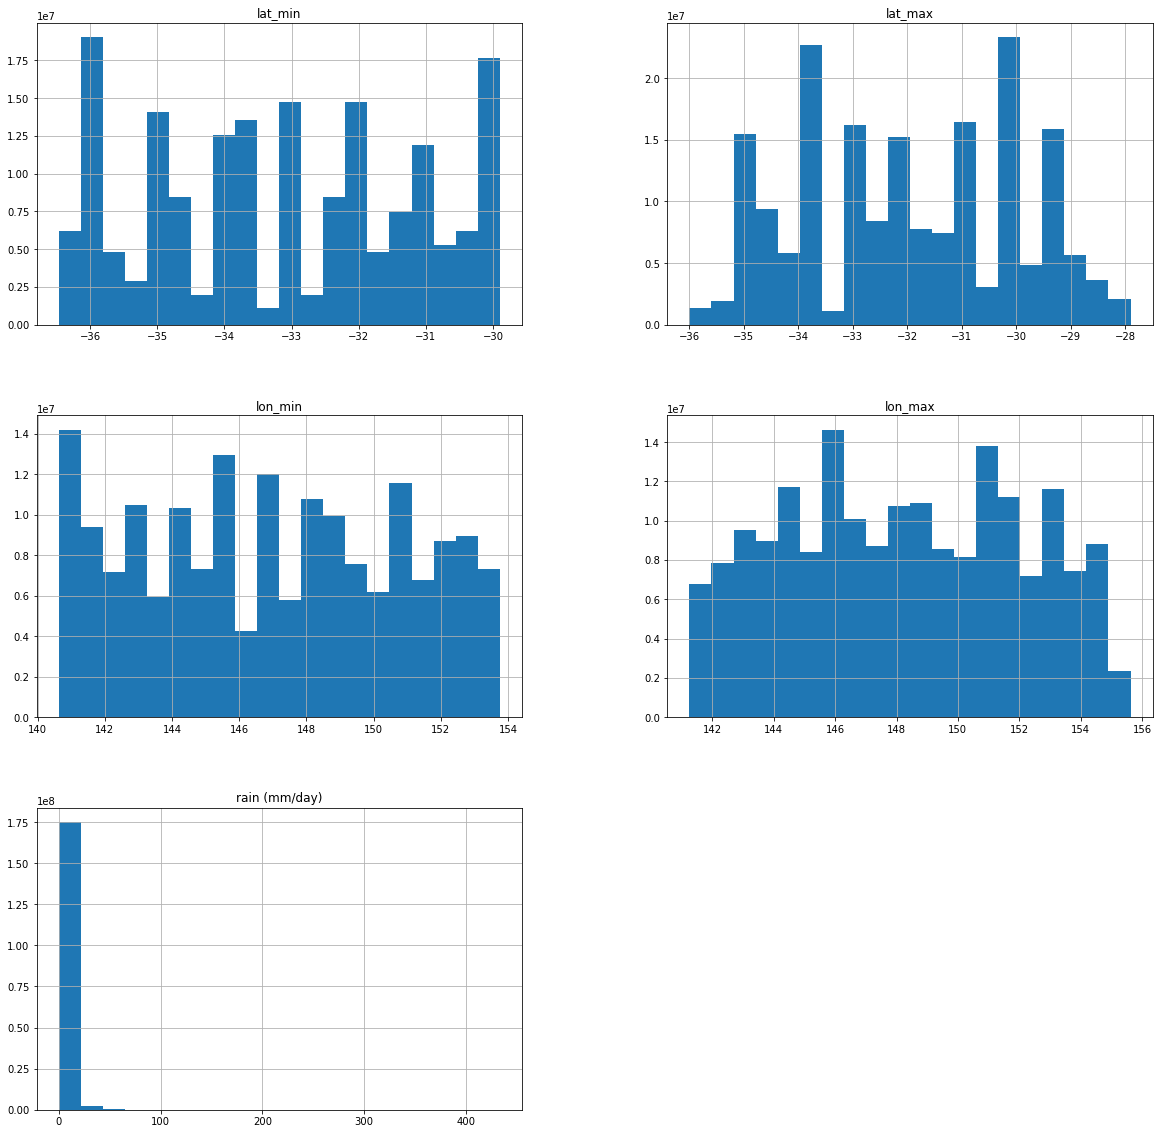

In [24]:
%%time
df_red_dtypes.hist(figsize=(20, 20), bins=20)
pass